Este modelo es de trabajo Static Peruvian Sign Language Classifier Based on Manual Spelling Using a Convolutional Neural Network de los autores Gerardo Portocarrero-Banda1, Eveling Gloria Castro-Gutierrez, Abdel Alejandro Portocarrero-Banda, Claudia Acra-Despradel, David Rondon, Hugo Guillermo Jimenez-Pacheco and Miguel Angel Ortiz-Esparza. 
El trabajo se puede encontrar en el siguiente link: https://ceur-ws.org/Vol-3693/paper17.pdf

La arquitectura de este modelo es el siguiente:

- Objetivo: reconocer alfabetos estáticos de la Lengua de Señas Peruana (PSL) mediante clasificación multiclase (25 clases), generando probabilidades con Softmax en la capa de salida.  

- Arquitectura de la red:  
    - 4 capas convolucionales (Conv2D):  
        - 32 filtros, kernel 3×3, activación ReLU.  
        - 64 filtros, kernel 3×3, activación ReLU.  
        - 128 filtros, kernel 3×3, activación ReLU.  
        - 256 filtros, kernel 3×3, activación ReLU.  
    - 4 capas de MaxPooling2D (2×2), una después de cada convolución.  
    - Dropout (30%) tras la última capa convolucional.  
    - Flatten layer para convertir mapas de características en un vector.  
    - Red totalmente conectada (DNN):  
        - Dense(256) → ReLU.  
        - Dense(128) → ReLU.  
        - Dense(64) → ReLU.  
        - Dense(32) → ReLU.  
    - Dropout (30%) tras las capas ocultas.  
    - Capa de salida: Dense(25) → Softmax.  

- Configuración de entrenamiento:  
    - Función de pérdida: categorical_crossentropy.  
    - Optimizador: Adam con learning_rate=0.001.  
    - Métrica principal: accuracy.  
    - Callbacks:  
        - ModelCheckpoint para guardar el mejor modelo.  
        - EarlyStopping para detener el entrenamiento si no mejora la validación.  

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_cnn(input_shape=(128, 128, 3), num_classes=24, lr=0.001):
    model = Sequential()

    # Convolutional Layers
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(256, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Dropout(0.3))

    model.add(Flatten())

    # Fully Connected Layers
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # Dropout
    model.add(Dropout(0.3))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compilación
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [2]:

model = build_cnn(input_shape=(224,224,3), num_classes=24, lr=0.001)
model.summary()

c:\Users\sebas\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,869,880 (37.65 MB)

 Trainable params: 9,869,880 (37.65 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_dataset(dataset_path, img_size=224):
    X, y = [], []
    class_names = sorted(os.listdir(dataset_path))
    class_to_idx = {c: i for i, c in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_dir):
            continue

        for file_name in os.listdir(class_dir):
            if file_name.endswith(".npy"):
                file_path = os.path.join(class_dir, file_name)
                arr = np.load(file_path) 
                X.append(arr)
                y.append(class_to_idx[class_name])
    X = np.array(X)
    y = np.array(y)

    print(f"Dataset cargado: {X.shape[0]} imágenes, {len(class_names)} clases")
    return X, y, class_names

In [7]:
DATASET_PATH = "CreateDataSets\datasets\Static-Hand-Gestures-Alphabet-ThinkName"
X, y, class_names = load_dataset(DATASET_PATH, img_size=224)

Dataset cargado: 3600 imágenes, 24 clases


In [8]:
y = to_categorical(y, num_classes=len(class_names))

In [9]:
# Dividir dataset en entrenamiento (70%), validación (15%) y test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (2520, 224, 224, 3) (2520, 24)
Val: (540, 224, 224, 3) (540, 24)
Test: (540, 224, 224, 3) (540, 24)


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint]
)


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.1786 - loss: 2.8220
Epoch 1: val_accuracy improved from -inf to 0.53333, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - accuracy: 0.1796 - loss: 2.8186 - val_accuracy: 0.5333 - val_loss: 1.6614
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.4992 - loss: 1.6377
Epoch 2: val_accuracy improved from 0.53333 to 0.77037, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 294ms/step - accuracy: 0.4998 - loss: 1.6359 - val_accuracy: 0.7704 - val_loss: 0.8327
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.6961 - loss: 0.9343
Epoch 3: val_accuracy improved from 0.77037 to 0.84074, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 293ms/step - accuracy: 0.6963 - loss: 0.9340 - val_accuracy: 0.8407 - val_loss: 0.5751
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.7937 - loss: 0.6752
Epoch 4: val_accuracy improved from 0.84074 to 0.86667, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 294ms/step - accuracy: 0.7937 - loss: 0.6748 - val_accuracy: 0.8667 - val_loss: 0.4201
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8281 - loss: 0.5343
Epoch 5: val_accuracy improved from 0.86667 to 0.88148, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 298ms/step - accuracy: 0.8283 - loss: 0.5335 - val_accuracy: 0.8815 - val_loss: 0.4159
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.8679 - loss: 0.4046
Epoch 6: val_accuracy improved from 0.88148 to 0.89630, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.8680 - loss: 0.4045 - val_accuracy: 0.8963 - val_loss: 0.3493
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.8916 - loss: 0.3380
Epoch 7: val_accuracy improved from 0.89630 to 0.92593, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 291ms/step - accuracy: 0.8917 - loss: 0.3379 - val_accuracy: 0.9259 - val_loss: 0.3143
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9290 - loss: 0.2274
Epoch 8: val_accuracy did not improve from 0.92593
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - accuracy: 0.9290 - loss: 0.2278 - val_accuracy: 0.9111 - val_loss: 0.3350
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9259 - loss: 0.2345
Epoch 9: val_accuracy did not improve from 0.92593
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - accuracy: 0.9259 - loss: 0.2346 - val_accuracy: 0.9167 - val_loss: 0.3133
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9356 - loss: 0.2110
Epoch 10: val_accuracy improved from 0.92593 to 0.92963, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.9356 - loss: 0.2110 - val_accuracy: 0.9296 - val_loss: 0.2940
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9426 - loss: 0.1759
Epoch 11: val_accuracy did not improve from 0.92963
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 311ms/step - accuracy: 0.9425 - loss: 0.1762 - val_accuracy: 0.9130 - val_loss: 0.3295
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.9499 - loss: 0.1463
Epoch 12: val_accuracy improved from 0.92963 to 0.93333, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.9499 - loss: 0.1463 - val_accuracy: 0.9333 - val_loss: 0.3455
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.9490 - loss: 0.1415
Epoch 13: val_accuracy did not improve from 0.93333
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.9491 - loss: 0.1413 - val_accuracy: 0.9333 - val_loss: 0.2911
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9519 - loss: 0.1274
Epoch 14: val_accuracy improved from 0.93333 to 0.94074, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 300ms/step - accuracy: 0.9519 - loss: 0.1276 - val_accuracy: 0.9407 - val_loss: 0.2564
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9691 - loss: 0.1091
Epoch 15: val_accuracy did not improve from 0.94074
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 303ms/step - accuracy: 0.9690 - loss: 0.1091 - val_accuracy: 0.9389 - val_loss: 0.3534
Epoch 16/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9631 - loss: 0.1111
Epoch 16: val_accuracy did not improve from 0.94074
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 324ms/step - accuracy: 0.9631 - loss: 0.1111 - val_accuracy: 0.9019 - val_loss: 0.4838
Epoch 17/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9627 - loss: 0.1081
Epoch 17: val_accuracy did not improve from 0.94074
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 339ms/step - accuracy: 0.9627 - loss: 0.1081 - val_accuracy: 0.9185 - val_loss: 0.4235
Epoch 18/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.9619 - loss: 0.1422
Epoch 18: val_accuracy d

79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 315ms/step - accuracy: 0.9790 - loss: 0.0708 - val_accuracy: 0.9426 - val_loss: 0.6391
Epoch 26/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9859 - loss: 0.0565
Epoch 26: val_accuracy did not improve from 0.94259
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 299ms/step - accuracy: 0.9859 - loss: 0.0567 - val_accuracy: 0.9259 - val_loss: 0.4753
Epoch 27/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.9805 - loss: 0.0603
Epoch 27: val_accuracy did not improve from 0.94259
79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 676ms/step - accuracy: 0.9805 - loss: 0.0604 - val_accuracy: 0.9259 - val_loss: 0.5297
Epoch 28/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.9806 - loss: 0.0968
Epoch 28: val_accuracy did not improve from 0.94259
79/79 ━━━━━━━━━━━━━━━━━━━━ 62s 783ms/step - accuracy: 0.9806 - loss: 0.0964 - val_accuracy: 0.9296 - val_loss: 0.3631
Epoch 29/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.9825 - loss: 0.0631
Epoch 29: val_accuracy d

79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.9834 - loss: 0.0524 - val_accuracy: 0.9444 - val_loss: 0.4809
Epoch 41/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9905 - loss: 0.0363
Epoch 41: val_accuracy did not improve from 0.94444
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 298ms/step - accuracy: 0.9905 - loss: 0.0364 - val_accuracy: 0.9278 - val_loss: 0.5716
Epoch 42/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9870 - loss: 0.0538
Epoch 42: val_accuracy did not improve from 0.94444
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 303ms/step - accuracy: 0.9870 - loss: 0.0537 - val_accuracy: 0.9315 - val_loss: 0.6412
Epoch 43/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9868 - loss: 0.0465
Epoch 43: val_accuracy did not improve from 0.94444
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 302ms/step - accuracy: 0.9867 - loss: 0.0468 - val_accuracy: 0.9204 - val_loss: 0.7140
Epoch 44/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.9792 - loss: 0.0702
Epoch 44: val_accuracy d

In [14]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 94.81%


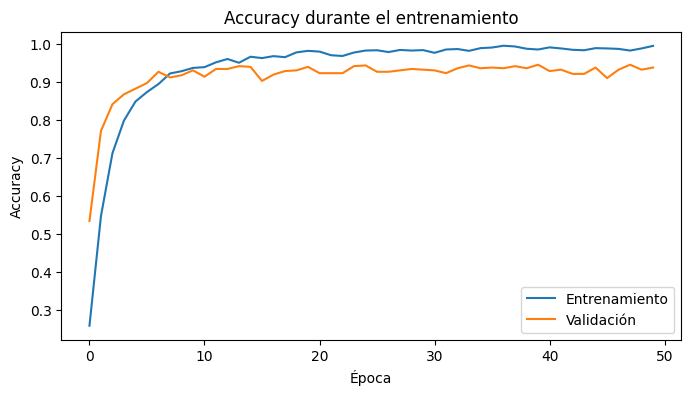

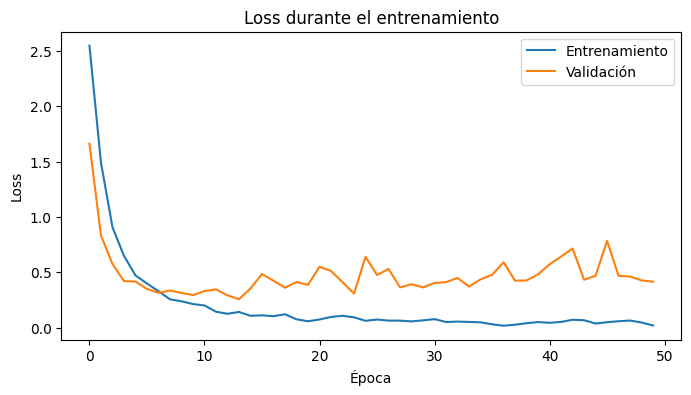

In [15]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Verificar que si esta en hot spot
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


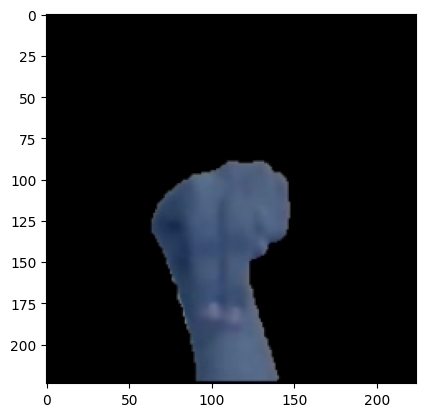

0.0 0.6


In [12]:
# Verificar como se han cargado las imagenes
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()
print(X_train[0].min(), X_train[0].max())